In [94]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import sys
from adjustText import adjust_text  # https://github.com/Phlya/adjustText/wiki
sys.path.append('/home/beards/code/epic_calculations/epic_calculations')
import telescope_observation
reload(telescope_observation)  # Do this while I'm developing telescope_observation
from telescope_observation import TelescopeObservation

In [95]:
dsa_layout = np.loadtxt('/home/beards/code/epic_calculations/layouts/dsa_5m_15km.txt')
ovro_lwa_layout = np.loadtxt('/home/beards/code/epic_calculations/layouts/lwa_5km.txt')
ngvla_core_layout = np.loadtxt('/home/beards/code/epic_calculations/layouts/ngvla_core.txt')
ngvla_sba_layout = np.loadtxt('/home/beards/code/epic_calculations/layouts/ngvla_sba.txt')
ngvla_compact_layout = np.concatenate([ngvla_core_layout, ngvla_sba_layout], axis=0)
ska_low_layout = np.loadtxt('/home/beards/code/epic_calculations/layouts/ska_low.txt')
mwa_compact_layout = np.loadtxt('/home/beards/code/epic_calculations/layouts/mwa_phase2_compact.txt')
mwa_extended_layout = np.loadtxt('/home/beards/code/epic_calculations/layouts/mwa_phase2_extended.txt')
mwa_iii_layout = np.concatenate([mwa_compact_layout, mwa_extended_layout])
hera_layout = np.loadtxt('/home/beards/code/epic_calculations/layouts/HERA350.txt')

# Open questions
- What integration time to use?
- How many channels should we assume for each telescope?
- Grid size - use FoV at lowest end of band? Center of band?
- Pick center frequency for tunable arrays (MWA)
- HERA layout

In [99]:
# Set up all the TelescopeObservations
integration = 1e-3
dsa = TelescopeObservation(layout=dsa_layout, Dant=5, f0=1.35e3, bandwidth=1.3e3,
                           df=0.1, integration=integration)
ovro = TelescopeObservation(layout=ovro_lwa_layout, Dant=1.5, f0=55, bandwidth=60.,
                            df=0.1, integration=integration)
ngvla = TelescopeObservation(layout=ngvla_compact_layout, Dant=18, f0=11.2e3, bandwidth=20e3,
                             df=1., integration=integration)
ska_low = TelescopeObservation(layout=ska_low_layout, Dant=35, f0=200, bandwidth=300.,
                               df=0.1, integration=integration)
ska_low_core = TelescopeObservation(layout=ska_low_layout, Darray=1e3, Dant=35, f0=200, bandwidth=300.,
                                    df=0.1, integration=integration)
ska_low_extreme_core = TelescopeObservation(Darray=1e3, Nant=131072. / 2., Dant=1., f0=200, bandwidth=300.,
                                            df=0.1, integration=integration)
mwa_ii_compact = TelescopeObservation(layout=mwa_compact_layout, Dant=4.5, f0=200, bandwidth=30.72,
                                      df=0.04, integration=integration)
mwa_ii_extended = TelescopeObservation(layout=mwa_extended_layout, Dant=4.5, f0=200, bandwidth=30.72,
                                       df=0.02, integration=integration)
mwa_iii = TelescopeObservation(layout=mwa_iii_layout, Dant=4.5, f0=200, bandwidth=30.72 * 2,
                                       df=0.01, integration=integration)
puma_light = TelescopeObservation(Darray=600., Nant=5e3, Dant=6., f0=650, bandwidth=900.,
                                  df=.5, integration=integration)
puma_full = TelescopeObservation(Darray=1500., Nant=32e3, Dant=6., f0=650, bandwidth=900.,
                                 df=.5, integration=integration)
hera = TelescopeObservation(layout=hera_layout, Dant=14., f0=150., bandwidth=200., df=0.04,
                            integration=integration)
hera_core = TelescopeObservation(layout=hera_layout, Dant=14., Darray=310., f0=150., bandwidth=200.,
                                 df=.04, integration=integration)

In [100]:
obs_dict = {'DSA-2000': dsa, 'OVRO-LWA-2000': ovro, 'NGVLA': ngvla, 'SKA-Low': ska_low, 'SKA-Low Core': ska_low_core,
            'SKA-Low Extreme Core': ska_low_extreme_core, 'MWA-II Compact': mwa_ii_compact,
            'MWA-II Extended': mwa_ii_extended, 'MWA-III': mwa_iii, 'PUMA light': puma_light,
            'PUMA Full': puma_full, 'HERA': hera, 'HERA core': hera_core}
epic_flops = np.array([1e-9 * obs.vanilla_EPIC_stats(verbose=False) for obs in obs_dict.values()])
fx_flops = np.array([1e-9 * obs.FX_stats(verbose=False) for obs in obs_dict.values()])

<IPython.core.display.Javascript object>


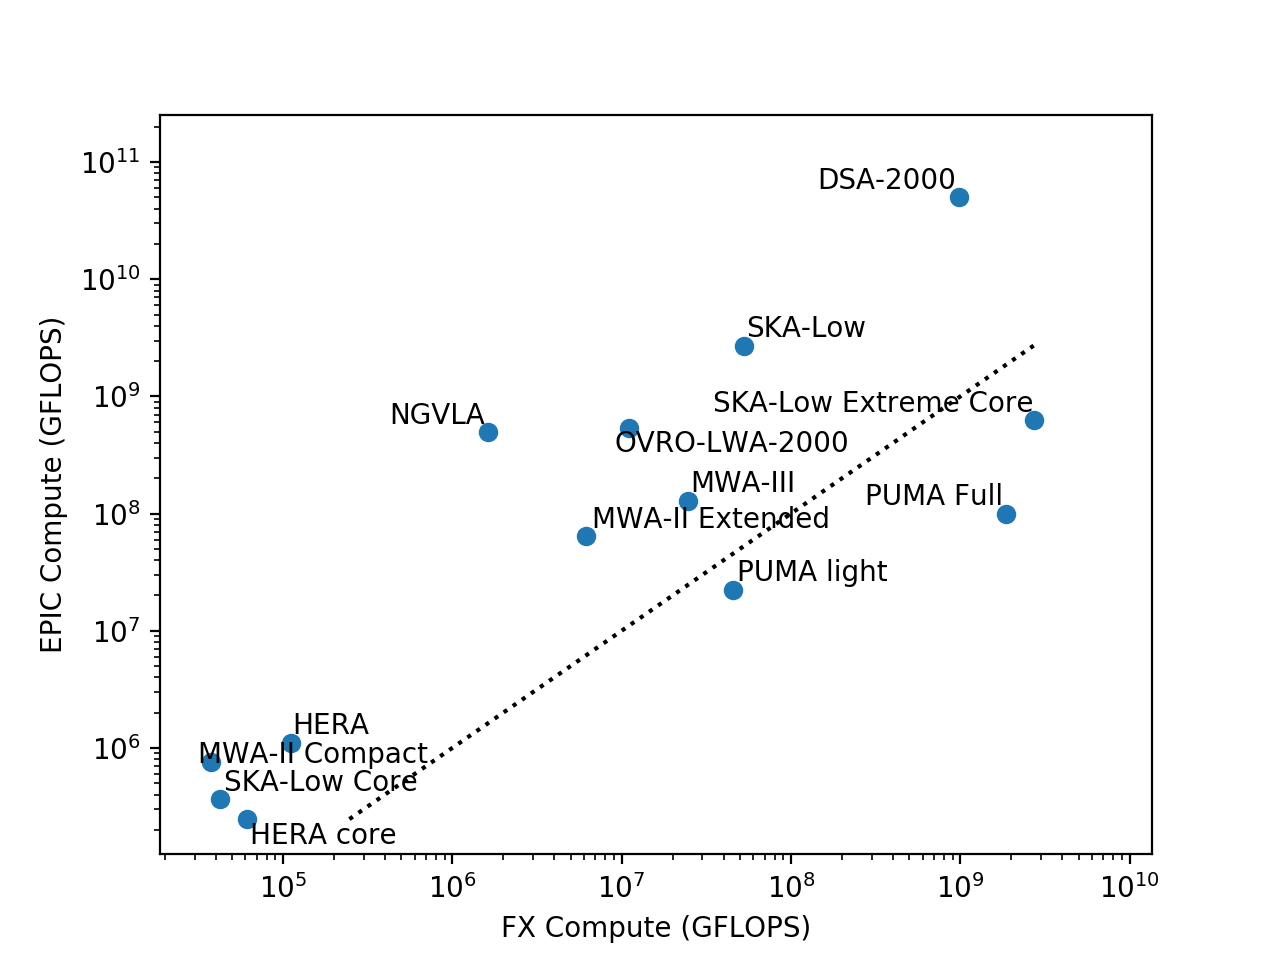

(123281.11925556067, 251256523747.07959)

In [101]:
plt.figure()
plt.loglog(fx_flops, epic_flops, 'o')
plt.plot([np.min(epic_flops), np.max(fx_flops)], [np.min(epic_flops), np.max(fx_flops)], ':k')
texts = [plt.text(x, y, label, ha='center', va='center') for label, x, y in zip(obs_dict.keys(), fx_flops, epic_flops)]
adjust_text(texts)

plt.xlabel('FX Compute (GFLOPS)')
plt.ylabel('EPIC Compute (GFLOPS)')
plt.xlim([.5 * fx_flops.min(), 5 * fx_flops.max()])
plt.ylim([.5 * epic_flops.min(), 5 * epic_flops.max()])

In [51]:
epic_flops = np.array([1e-9 * obs.vanilla_EPIC_stats(verbose=True) for obs in obs_dict.values()])

Input bandwidth = 121260.0 MBps
Npix = 268435456.0
Cadence = 1.70666666667e-05 s
Gridding GFLOPS per channel (avg) = 1.26018943823
Total gridding GFLOPS = 1290.43398475
FFT GFLOPS per channel = 2202009.6
Total FFT GFLOPS = 2254857830.4
Total squaring GFLOPS = 64424509.44
All the GFLOPS = 2254857833.4
Input bandwidth = 64000.0 MBps
Npix = 65536.0
Cadence = 4.096e-05 s
Gridding GFLOPS per channel (avg) = 0.161463420217
Total gridding GFLOPS = 1322.70833842
FFT GFLOPS per channel = 128.0
Total FFT GFLOPS = 1048576.0
Total squaring GFLOPS = 52428.8
All the GFLOPS = 1048589.0
Input bandwidth = 67200.0 MBps
Npix = 262144.0
Cadence = 3.41333333333e-06 s
Gridding GFLOPS per channel (avg) = 2.49451979472
Total gridding GFLOPS = 2554.38826979
FFT GFLOPS per channel = 6912.0
Total FFT GFLOPS = 7077888.0
Total squaring GFLOPS = 314572.8
All the GFLOPS = 7077903.0
Input bandwidth = 70000.0 MBps
Npix = 1048576.0
Cadence = 4.096e-05 s
Gridding GFLOPS per channel (avg) = 0.176600615863
Total gridding 

In [52]:
hera_core.vanilla_EPIC_stats(verbose=True)

Input bandwidth = 64000.0 MBps
Npix = 65536.0
Cadence = 4.096e-05 s
Gridding GFLOPS per channel (avg) = 0.161463420217
Total gridding GFLOPS = 1322.70833842
FFT GFLOPS per channel = 128.0
Total FFT GFLOPS = 1048576.0
Total squaring GFLOPS = 52428.8
All the GFLOPS = 1048589.0


1048589000000000.0

<IPython.core.display.Javascript object>


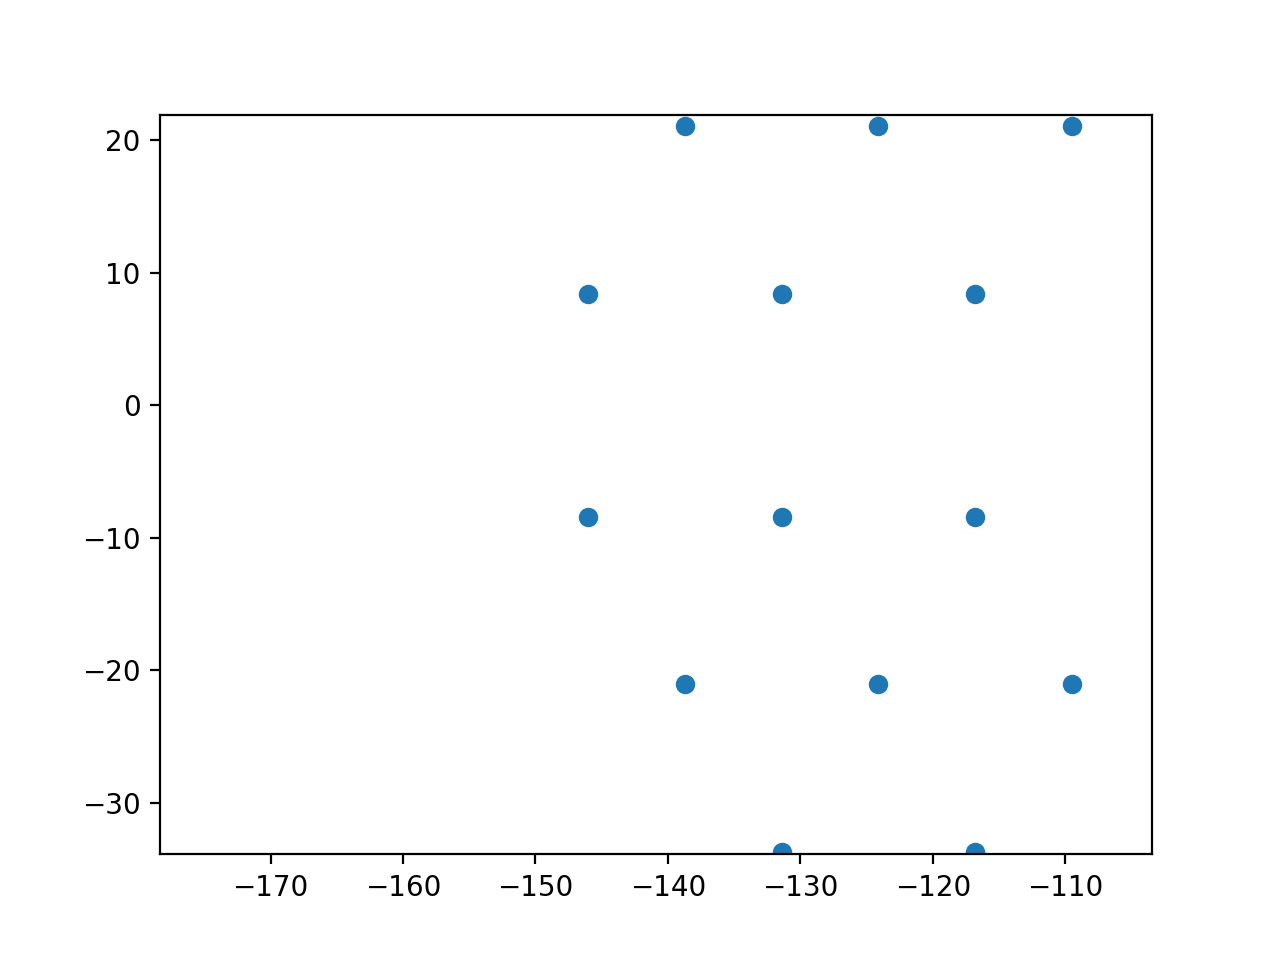

/data4/beards/src/anaconda/envs/EPIC/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [32]:
plt.figure()
hera.plot_layout()

In [65]:
test = TelescopeObservation(Nant=256, Darray=100, Dant=14, grid_size=2.5, Nchan=512, bandwidth=51.2, f0=75)

In [66]:
test.vanilla_EPIC_stats(verbose=True)

Input bandwidth = 13107.2 MBps
Npix = 1024.0
Cadence = 1e-05 s
Gridding GFLOPS per channel (avg) = 0.104408950347
Total gridding GFLOPS = 53.4573825778
FFT GFLOPS per channel = 5.12
Total FFT GFLOPS = 2621.44
Total squaring GFLOPS = 209.7152
All the GFLOPS = 2621.44


2621440000000.0

In [59]:
test.cadence

5.12e-06

In [72]:
mwa_ii_extended.Nant

128

In [73]:
mwa_iii.Nant

256

In [78]:
# mwa_ii_extended.FX_stats(verbose=True)
print('')
mwa_ii_extended.vanilla_EPIC_stats(verbose=True)


Input bandwidth = 3932.16 MBps
Npix = 16777216.0
Cadence = 3.33333333333e-05 s
Gridding GFLOPS per channel (avg) = 0.00769512901443
Total gridding GFLOPS = 7.87981211077
FFT GFLOPS per channel = 60397.9776
Total FFT GFLOPS = 61847529.0624
Total squaring GFLOPS = 2061584.30208
All the GFLOPS = 63909122.7803


63909122780292112.0

In [79]:
# mwa_iii.FX_stats(verbose=True)
print('')
mwa_iii.vanilla_EPIC_stats(verbose=True)


Input bandwidth = 15728.64 MBps
Npix = 16777216.0
Cadence = 1.66666666667e-05 s
Gridding GFLOPS per channel (avg) = 0.0309620642309
Total gridding GFLOPS = 31.7051537724
FFT GFLOPS per channel = 120795.9552
Total FFT GFLOPS = 123695058.125
Total squaring GFLOPS = 4123168.60416
All the GFLOPS = 127818261.506


1.2781826150611378e+17

In [93]:
import scipy.constants as const
const.speed_of_light * 1e-8

2.9979245800000003